# Add indexs

In [1]:
# INIT
import os,sys
import yfinance as yf
from datetime import date,datetime
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../../")) # My .py library
import rbt.py.excel as exc
from rbt.py.index import Index
# COLORS
color       = ['blue','red','yellow','green','orange','brown']
# READ SWC
swc         = exc.Swc(enable=False, SWC_file=os.path.abspath("../../SWC.xlsx"), verbose=False)
swc.read()
print("INIT")
print("*"*100)
# DESIRED DATE
d_end   = date.today().strftime('%d/%m/%Y')#("%b-%d-%Y") # Today
end     = datetime.strptime(d_end, "%d/%m/%Y")
start   = date(end.year -2,end.month ,end.day+2)
print("Start: ",start.strftime(("%Y-%m-%d"))) #
print("Today: ",end.strftime(("%Y-%m-%d")))

Import(enable=False,verbose=False)
 
INIT
****************************************************************************************************
Start:  2020-04-03
Today:  2022-04-01


In [2]:
# DOWNLAOD Data Frame
# INPUT
tickers     ="BTC-USD"
interval    ='1h'
print("start ='",start.strftime(("%Y-%m-%d")),"'") #
print("end ='",end.strftime(("%Y-%m-%d")),"'")
stock       = yf.download(tickers = tickers,group_by = 'ticker',start=start.strftime(("%Y-%m-%d")) , end=end.strftime(("%Y-%m-%d")),interval=interval)

start =' 2020-04-03 '
end =' 2022-04-01 '
[*********************100%***********************]  1 of 1 completed


In [3]:
# ADD SMA and RSI
stock = Index.add_sma(stock,20)
stock = Index.add_sma(stock,50)
stock = Index.add_sma(stock,100)
stock = Index.add_sma(stock,200)
stock = Index.add_rsi(stock,24) # Es. 1 giorno 24 campioni
stock = Index.add_stocastich(stock)

Added Sma_20, 20 campioni
Added Sma_50, 50 campioni
Added Sma_100, 100 campioni
Added Sma_200, 200 campioni
Added Rsi_24, 24 campioni
TBD


# Plot Stock

In [ ]:
# TABLE Inverse
stock[:-20:-1] 

Interval:  1h
2020-04-02 22:00:00+00:00	2022-03-31 21:00:00+00:00
6583.78466796875	68622.6328125


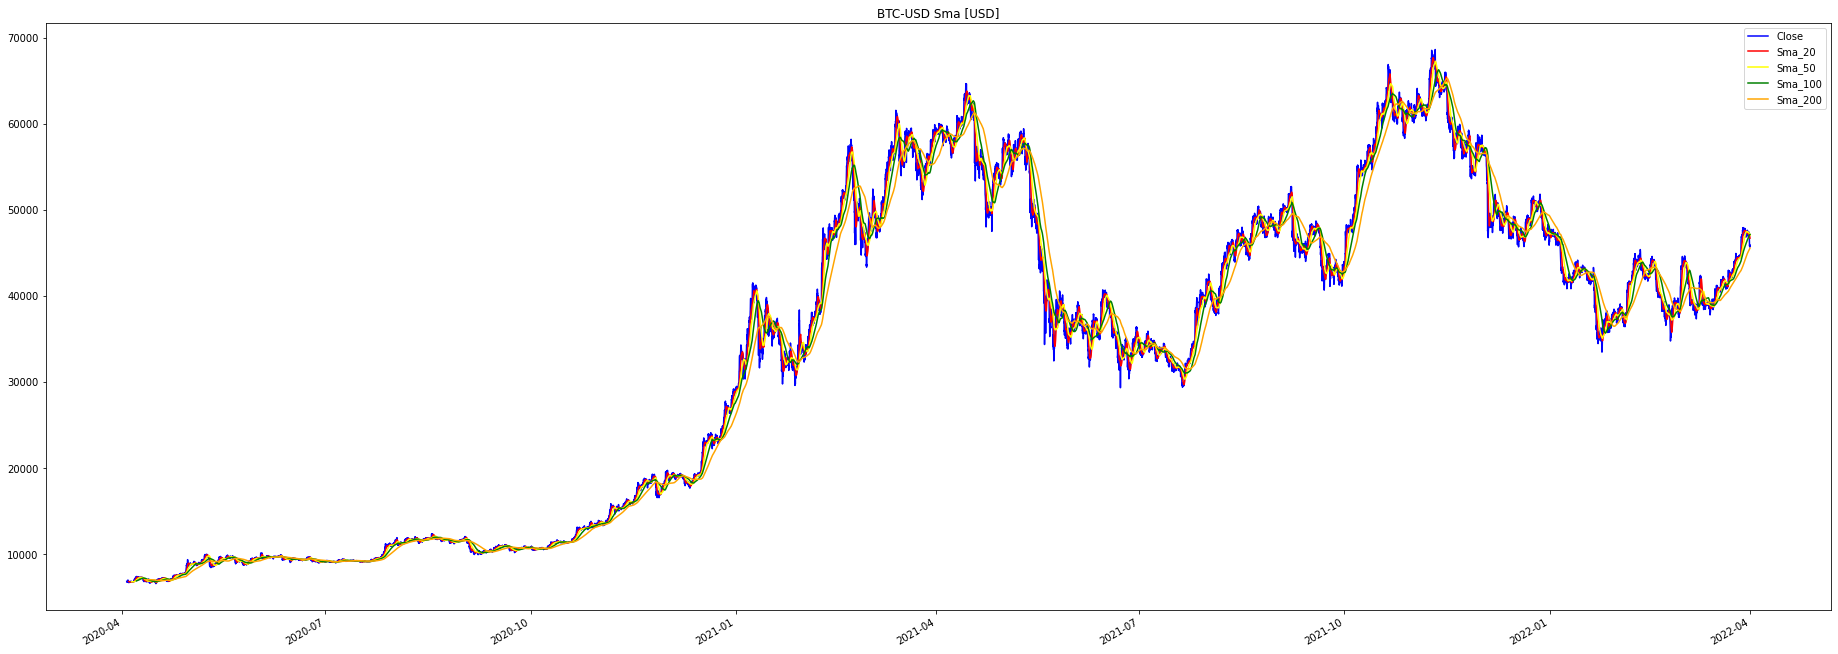

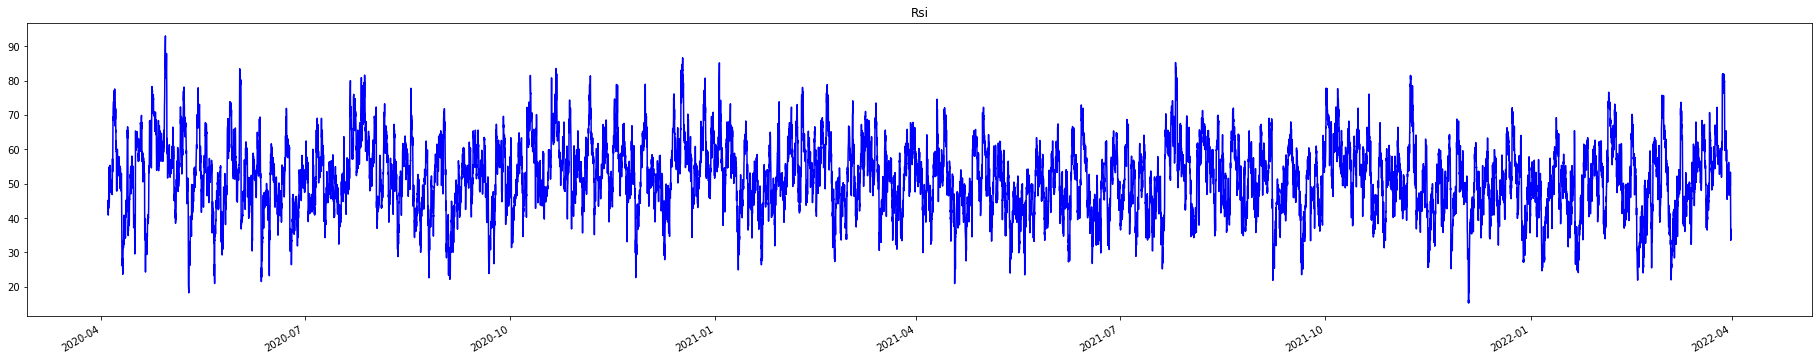

In [4]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# PLOT TUTTI GLI INDICI
print("Interval: ",interval)
print(stock.index[0],stock.index[-1],sep='\t')
print(stock['Close'].min(),stock['Close'].max(), sep = '\t')

pl1 = stock[['Close','Sma_20','Sma_50','Sma_100','Sma_200']].plot(subplots=False, color=color ,figsize=(32,12),title=f'{tickers} Sma [USD]')
plt.figure()
pl2 = stock['Rsi_24'].plot(subplots=False, color=color ,figsize=(32,6),title='Rsi')



Interval:  1h
Ultimi 30 giorni
2022-03-01 21:00:00+00:00	2022-03-31 21:00:00+00:00
47938.140625
37337.28515625


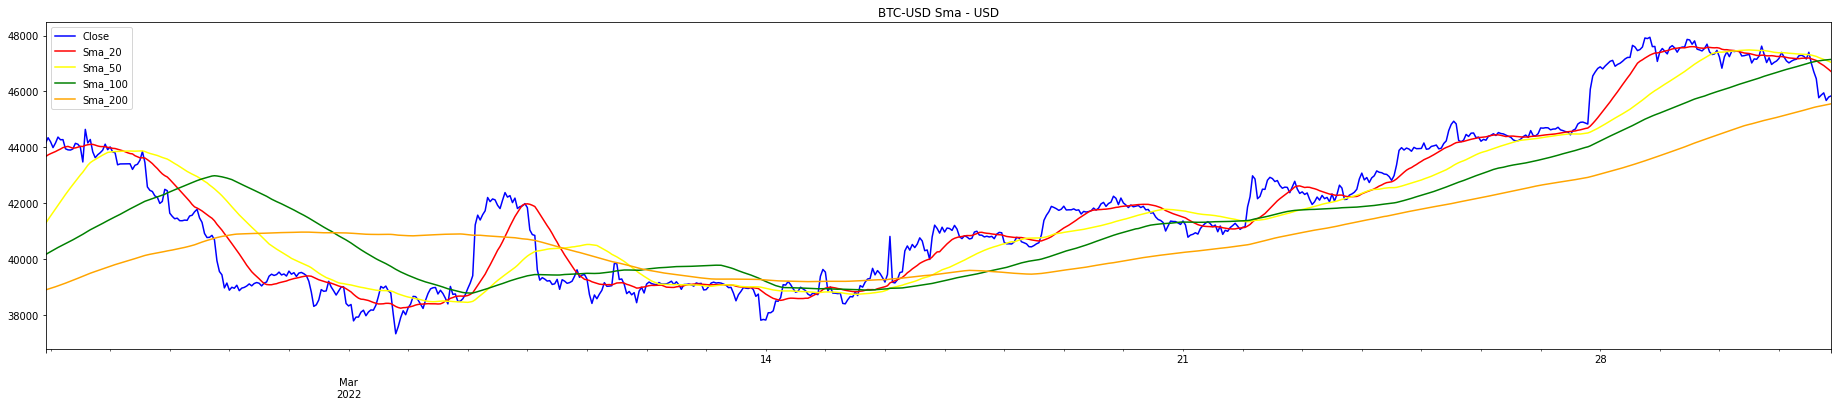

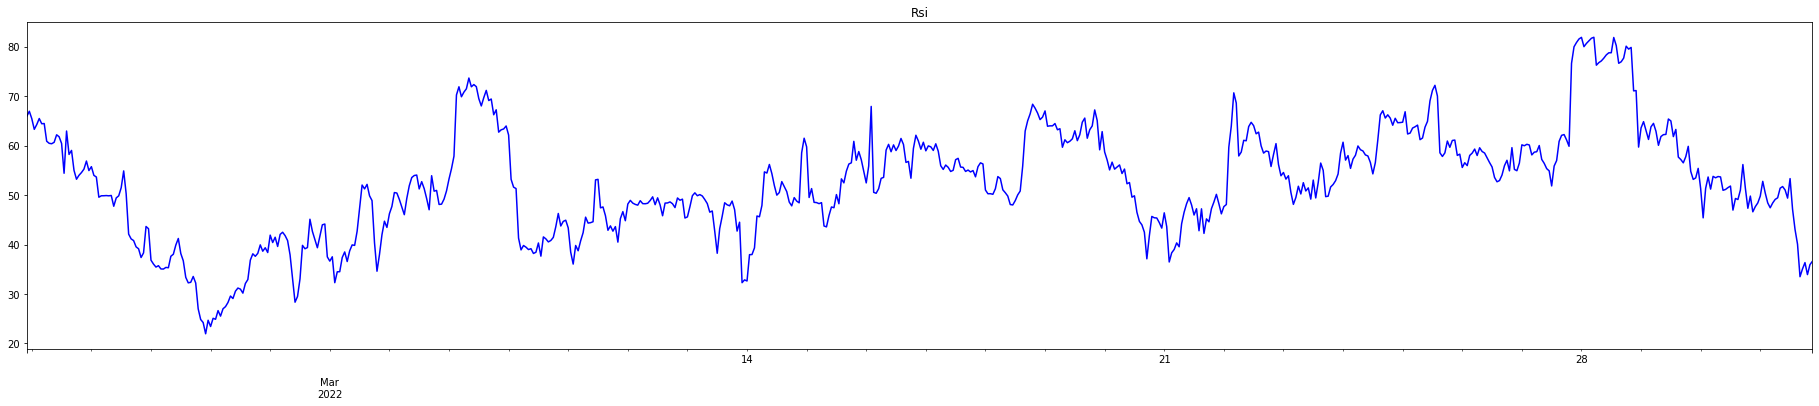

In [12]:
# LAST sample
h = 24 # sample
d = 30 # days
m = 1  # months
print("Interval: ",interval)
sample = h * d * m
print(f"Ultimi {d*m} giorni")
print(stock['Close'].index[-1-sample],stock['Close'].index[-1],sep='\t')
print(stock['Close'].tail(sample).max())
print(stock['Close'].tail(sample).min())

pl1 = stock[['Close','Sma_20','Sma_50','Sma_100','Sma_200']].tail(sample).plot(subplots=False, color=color ,figsize=(32,6),title=f'{tickers} Sma - USD')
plt.figure()
pl2 = stock['Rsi_24'].tail(sample).plot(subplots=False, color=color ,figsize=(32,6),title='Rsi')

Interval:  1h
68622.6328125
29032.3125
2021-01-01 00:00:00+00:00
2021-12-30 00:00:00+00:00


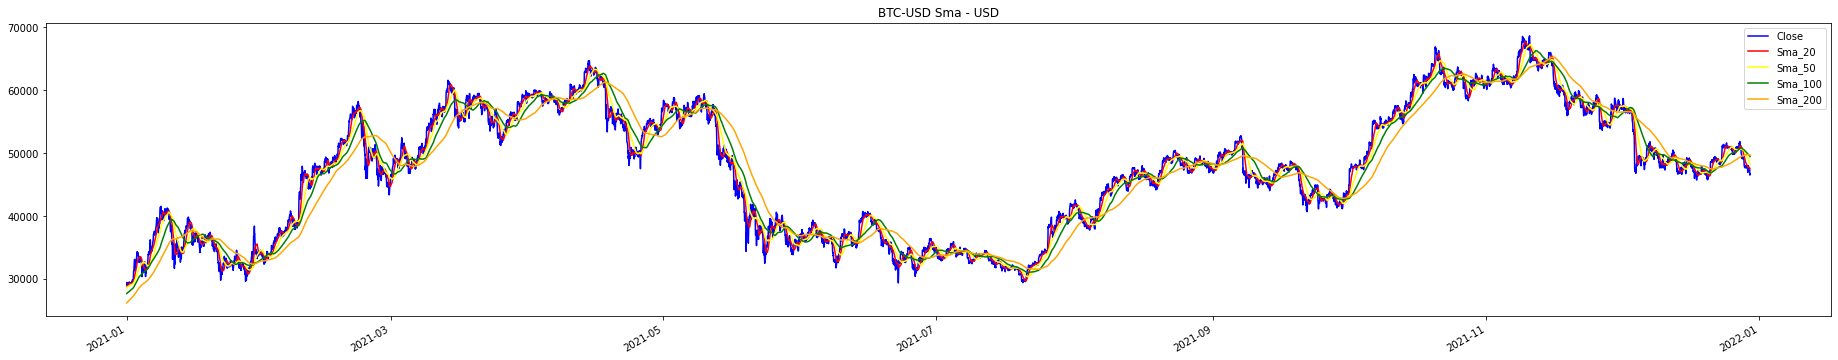

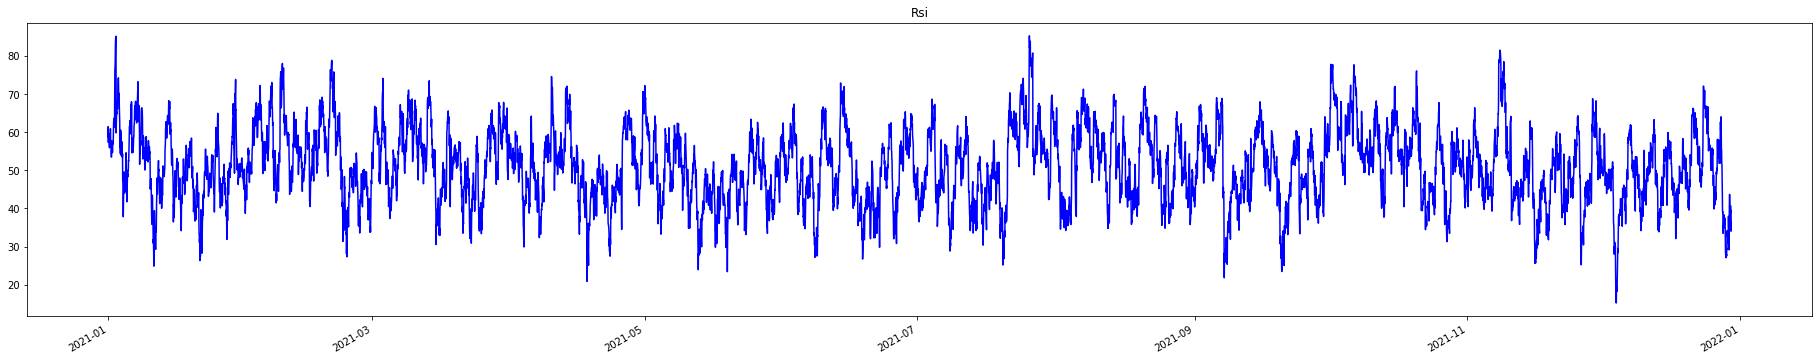

In [6]:
# FROM DATE TO DATE
p1 = '2021-01-01 00:00:00+00:00' # Point 1
p2 = '2021-12-30 00:00:00+00:00' # Point 2
print("Interval: ",interval)
print(stock['Close'].loc[p1:p2].max())
print(stock['Close'].loc[p1:p2].min())

print(p1,p2,sep='\n')
sel1 = stock[['Close','Sma_20','Sma_50','Sma_100','Sma_200']].loc[p1:p2].plot(subplots = False,color=color ,figsize=(32,6),title=f'{tickers} Sma - USD') # two days
plt.figure()
sel2 = stock['Rsi_24'].loc[p1:p2].plot(subplots = False,color=color ,figsize=(32,6),title='Rsi') # two days


In [9]:
stock.iloc[1:30]

,Open,High,Low,Close,Adj Close,Volume,Sma_20,Sma_50,Sma_100,Sma_200,Rsi_24
2020-04-03 00:00:00+00:00,6792.833984,6803.883301,6748.271484,6748.271484,6748.271484,0,NaN,NaN,NaN,NaN,NaN
2020-04-03 01:00:00+00:00,6747.588867,6804.413086,6740.051270,6804.411133,6804.411133,353132544,NaN,NaN,NaN,NaN,NaN
2020-04-03 02:00:00+00:00,6806.422363,6826.375000,6791.752930,6815.301270,6815.301270,0,NaN,NaN,NaN,NaN,NaN
2020-04-03 03:00:00+00:00,6815.048828,6828.102051,6791.600098,6797.683105,6797.683105,0,NaN,NaN,NaN,NaN,NaN
2020-04-03 04:00:00+00:00,6797.840332,6800.887695,6780.705566,6792.535645,6792.535645,0,NaN,NaN,NaN,NaN,NaN
2020-04-03 05:00:00+00:00,6794.579590,6797.108887,6770.450684,6786.861328,6786.861328,0,NaN,NaN,NaN,NaN,NaN
2020-04-03 06:00:00+00:00,6787.624512,6819.615234,6778.460938,6811.735352,6811.735352,275968000,NaN,NaN,NaN,NaN,NaN
2020-04-03 07:00:00+00:00,6809.485352,6932.288086,6805.924805,6928.115723,6928.115723,1240018944,NaN,NaN,NaN,NaN,NaN
2020-04-03 08:00:00+00:00,6928.249512,6943.820801,6893.509277,6916.189453,6916.189453,352825344,NaN,NaN,NaN,NaN,NaN
2020-04-03 09:00:00+00:00,6916.567871,6952.034180,6897.283203,6951.005859,6951.005859,659767296,NaN,NaN,NaN,NaN,NaN


# Development

In [ ]:
# https://stackoverflow.com/questions/61976027/scraping-yahoo-finance-at-regular-intervals
import yfinance as yf
tickers = ["BTC-USD","ETH-USD"]
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1h",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

In [ ]:
data["BTC-USD"] = data["BTC-USD"].tail(24)


In [ ]:
tickers =["BTC-USD","ETH-USD"]
STOCK = yf.download(tickers = tickers,group_by = 'ticker',start='2020-4-1', end='2022-3-31',interval='1h')

In [ ]:
idx= 0
print(tickers[idx])
STOCK[tickers[idx]] = STOCK[tickers[idx]][::-1] #inverse 
STOCK[tickers[idx]].tail(240) # last 10 days


In [ ]:
# https://wire.insiderfinance.io/calculate-rsi-with-python-and-yahoo-finance-c8fb78b1c199

In [ ]:
# https://wire.insiderfinance.io/calculate-rsi-with-python-and-yahoo-finance-c8fb78b1c199

import yfinance as yf
#import talib
import matplotlib.pyplot as plt
# Get symbol OHLC data
data = yf.download("BTC-USD", start="2010-03-01", end="2022-03-28", interval = "1d")


def RSI(data, window=14, adjust=False):
    delta = data['Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains < 0] = 0
    loss[loss > 0] = 0

    gain_ewm = gains.ewm(com=window - 1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window - 1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100 / (1 + RS)

    return RSI

reversed_df = data.iloc[::-1]
data["RSI"] = RSI(reversed_df, 14)
print(data.head())

ax1 = plt.subplot2grid((10, 1), (0, 0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((10, 1), (5, 0), rowspan=4, colspan=1)

ax1.plot(data['Close'], linewidth=2.5)
ax1.set_title('Bitcoin USD (BTC-USD)')
ax2.plot(data['RSI'], color='red', linewidth=1.5)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='grey')
ax2.set_title('Bitcoin RSI - Volume')
ax2.plot(data['Volume'], color='red', linewidth=1.5)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='grey')

plt.show()

# Development

In [ ]:
# https://medium.com/codex/picking-stocks-with-a-quantitative-momentum-strategy-in-python-b15ac8925ec6
import pandas as pd
import requests
import numpy as np
from scipy.stats import percentileofscore as score
from statistics import mean
from math import floor

In [ ]:
def get_intraday_prices(symbol):
    ticker = symbol
    iex_api_key = 'YOUR API KEY'
    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices?token={iex_api_key}'
    df = requests.get(url).json()
    date = df[1]['date']
        
    time = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    number_of_trades = []
    
    for i in range(len(df)):
        time.append(df[i]['label'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
        volume.append(df[i]['volume'])
        number_of_trades.append(df[i]['numberOfTrades'])
        
    time_df = pd.DataFrame(time).rename(columns = {0:'Time'})
    open_df = pd.DataFrame(open).rename(columns = {0:'Open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'High'})
    low_df = pd.DataFrame(low).rename(columns = {0:'Low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'Close'})
    volume_df = pd.DataFrame(volume).rename(columns = {0:'Volume'})
    number_of_trades_df = pd.DataFrame(number_of_trades).rename(columns = {0:'Number of Trades'})
     
    frames = [time_df, open_df, high_df, low_df, close_df, volume_df, number_of_trades_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('Time')
    return df
  
df = pd.DataFrame(columns = sp500_list)
for i in df.columns:
    try:
        df[i] = get_intraday_prices(i)['Close']
        print(f'{i} is successfully extracted')
    except:
        pass
    
df.to_csv('sp500.csv')
sp500 = pd.read_csv('sp500.csv').set_index('Time')
sp500.head()

In [ ]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_list = np.array(sp500[0]['Symbol'])
sp500_list[:20]

dc = []
for i in sp500.columns:
    dc.append(sp500[i].pct_change().sum())
    
sp500_momentum = pd.DataFrame(columns = ['symbol', 'day_change'])
sp500_momentum['symbol'] = sp500.columns
sp500_momentum['day_change'] = dc

# CALCULATING MOMENTUM

sp500_momentum['momentum'] = 'N/A'
for i in range(len(sp500_momentum)):
    sp500_momentum.loc[i, 'momentum'] = score(sp500_momentum.day_change, sp500_momentum.loc[i, 'day_change'])/100
    
sp500_momentum['momentum'] = sp500_momentum['momentum'].astype(float)    
sp500_momentum.head()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from datetime import datetime
init_notebook_mode()


open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

# Development2

In [ ]:
import yfinance as yf
import pandas_ta as pta
def add_sma(stock,window):
    # Add Sma column
    sma = (lambda stock,sma:stock.Close.rolling(window).mean())
    name = f"Sma{window}"
    stock[name] = sma(stock,window) 
    return stock
# https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def add_rsi(stock,length):
    # Add Rsi column
    stock['Rsi'] = pta.rsi(stock['Close'], length = length) # Add Rsi column
    return stock
# INPUT
tickers ="BTC-USD"
stock = yf.download(tickers = tickers,group_by = 'ticker',start='2020-4-1', end='2022-3-31',interval='1h')

In [ ]:
def add_sma(stock,window):
    # Add Sma column
    sma = (lambda stock,sma:stock.Close.rolling(window).mean())
    name = f"Sma{window}"
    stock[name] = sma(stock,window) 
    return stock
# https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def add_rsi(stock,length):
    # Add Rsi column
    stock['Rsi'] = pta.rsi(stock['Close'], length = length) # Add Rsi column
    return stock


In [ ]:
stock = add_sma(stock,20)
stock = add_sma(stock,50)
stock = add_sma(stock,100)
stock = add_sma(stock,200)
stock = add_rsi(stock,14)
print(*stock.columns.tolist())

In [ ]:
https://www.learnpythonwithrune.org/pandas-calculate-the-stochastic-oscillator-indicator-for-stocks/

In [ ]:
stock['Close'] 

# DEVELOPMENT 3

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))



In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')